Task#1

a) Draw a graph f(x) to show its influence on image intensities

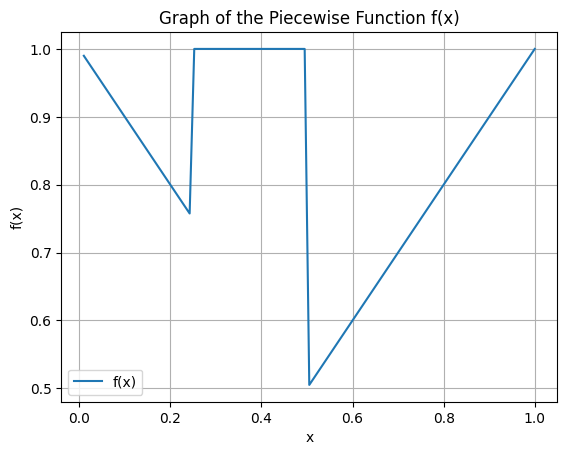

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def displayImage(title,image):
    cv2.imshow(title,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def f(x):
    if 0 < x <=0.25:
        return 1-x
    elif 0.25<x<=0.5:
        return 1
    elif x>0.5:
        return x

xValues = np.linspace(0, 1, 100)
yValues = [f(x) for x in xValues]

plt.plot(xValues, yValues, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of the Piecewise Function f(x)')
plt.grid(True)
plt.legend()
plt.show()



b) Write a Python to implement f(x) on an input image. Also show your result after transformation

In [38]:
goatedImage = cv2.imread('HamzaCR.jpeg',cv2.IMREAD_GRAYSCALE)
height, width = goatedImage.shape
graySlicedImage = np.zeros_like(goatedImage)
for i in range(height):
    for j in range(width):
        graySlicedImage[i,j] = f(goatedImage[i, j] / 255) * 255
displayImage('Sample Image',goatedImage)
displayImage('Gray Sliced',graySlicedImage)

Task#2 Histogram Equalization

In [39]:
goatedImage = cv2.imread('HamzaCR.jpeg',cv2.IMREAD_GRAYSCALE)
# equ = cv2.equalizeHist(goatedImage)
# res = np.hstack((goatedImage,equ))
# displayImage('Histogram Equalized',res)

hist = np.zeros(256,dtype=int)
for pixel in goatedImage.ravel():
    hist[pixel] +=1

# print(hist)

cdf = np.zeros(256,dtype=int)
cdf[0] = hist[0]
for i in range(1,256):
    cdf[i] = cdf[i-1] + hist[i]

# print(cdf)

cdfMin = cdf[np.nonzero(cdf)].min()

# print(cdfMin)

cdfRange = cdf.max() - cdfMin

# print(cdfRange)

cdfNormalized = (cdf-cdfMin) * 255 / cdfRange
cdfNormalized = np.clip(cdfNormalized,0,255).astype(np.uint8)

print(cdfNormalized)

equalizedImage = np.zeros_like(goatedImage)
for i in range(height):
    for j in range(width):
        equalizedImage[i,j] = cdfNormalized[goatedImage[i,j]]

result = np.hstack((goatedImage,equalizedImage))
displayImage('Histogram Equalized',result)





[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1
   2   2   3   4   4   5   5   6   6   7   9  11 158 160 161 162 162 163
 163 164 164 164 165 165 166 166 166 167 167 167 168 168 169 169 170 170
 171 171 172 172 172 173 173 174 174 175 176 176 177 178 178 179 180 181
 182 183 184 185 186 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 204 205 206 207 207 208 208 209 209 210 210 211
 212 212 213 213 214 214 215 216 216 217 217 218 218 219 219 220 220 221
 221 222 222 222 223 223 224 224 224 225 225 226 226 226 227 227 228 228
 229 229 230 230 230 231 231 232 232 232 233 233 234 234 234 235 235 236
 236 236 237 237 237 238 238 239 239 239 240 240 240 241 241 241 242 242
 242 243 243 243 244 244 245 245 245 246 246 247 247 247 248 248 248 248
 249 249 249 249 250 250 250 250 251 251 251 251 251 252 252 252 252 253
 253 253 253 253 253 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 25

Task#3: Contrast Stretching

In [40]:

def contrastStretching(r, rMin, rMax):
    return ((r - rMin) * (255 / (rMax - rMin)))

goatedImage = cv2.imread('HamzaCR.jpeg', cv2.IMREAD_GRAYSCALE)
contrastStretchedImage = np.zeros_like(goatedImage)
rMin = np.min(goatedImage)
rMax = np.max(goatedImage)
for i in range(height):
    for j in range(width):
        r = goatedImage[i, j]
        contrastStretchedImage[i, j] = contrastStretching(r, rMin, rMax)

# builtInContrastImage = cv2.normalize(goatedImage, None, 0, 255, cv2.NORM_MINMAX)

# displayImage('Sample Image',goatedImage)
# displayImage('Built In Contrast Stretching',builtInContrastImage)
displayImage('Contrast Stretching',contrastStretchedImage)
